In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uci-semcom/uci-secom.csv
/kaggle/input/semicon/uci-secom.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import tensorflow as tf

In [3]:
data = pd.read_csv('/kaggle/input/semicon/uci-secom.csv')
data

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [4]:
data.isnull().sum().sum()

41951

In [5]:
# 결측값에 모두 0 처리(데이터 크게 왜곡되지 않음)
data = data.replace(np.NaN, 0)

In [6]:
# -1:실패 / 1:성공
unique_vals = data['Pass/Fail'].unique()
unique_vals

array([-1,  1])

In [7]:
# pass, fail 데이터 분리
targets = [data.loc[data['Pass/Fail'] == val] for val in unique_vals]
targets

[                     Time        0        1          2          3       4  \
 0     2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
 1     2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
 3     2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
 4     2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
 5     2008-07-19 17:53:00  2946.25  2432.84  2233.3667  1326.5200  1.5334   
 ...                   ...      ...      ...        ...        ...     ...   
 1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
 1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
 1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
 1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
 1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   
 
           5         6       7       8  ...       581     582 

In [8]:
display(targets[0],targets[1])

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
5,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,...,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,0.0000,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,0.0000,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
10,2008-07-19 21:57:00,2994.05,2548.21,2195.1222,1046.1468,1.3204,100.0,103.3400,0.1223,1.5144,...,57.8122,0.4925,0.0158,0.0041,3.2115,0.0355,0.0205,0.0071,57.8122,1
11,2008-07-19 22:52:00,2928.84,2479.40,2196.2111,1605.7578,0.9959,100.0,97.9156,0.1257,1.4690,...,75.5077,0.4987,0.0427,0.0092,8.5646,0.0370,0.0279,0.0081,75.5077,1
14,2008-07-21 11:53:00,2963.97,2629.48,2224.6222,947.7739,1.2924,100.0,104.8489,0.1197,1.4474,...,142.9080,0.5077,0.0094,0.0026,1.8483,0.0202,0.0289,0.0084,142.9080,1
23,2008-07-25 15:23:00,2884.74,2514.54,2160.3667,899.9488,1.4022,100.0,105.4978,0.1240,1.5585,...,216.8869,0.4982,0.0099,0.0027,1.9771,0.0098,0.0213,0.0077,216.8869,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,2008-06-10 15:00:00,2988.39,2493.72,2206.4000,982.5452,1.1853,100.0,116.8167,0.1228,1.5279,...,0.0000,0.4972,0.0154,0.0035,3.0992,-0.0006,0.0118,0.0039,0.0000,1
1400,2008-07-10 13:10:00,3052.98,2515.51,2172.8111,969.3436,1.2736,100.0,102.7367,0.1243,1.4065,...,52.7014,0.5081,0.0158,0.0037,3.1106,0.0302,0.0159,0.0059,52.7014,1
1438,2008-09-10 04:34:00,2951.84,2477.13,2192.1889,1435.9611,2.3870,100.0,107.3989,0.1229,1.4613,...,0.0000,0.4969,0.0118,0.0037,2.3773,0.0178,0.0120,0.0038,67.7994,1
1443,2008-09-10 15:55:00,3173.18,2428.64,2209.4667,1556.3930,1.4884,100.0,95.1156,0.1206,1.6073,...,88.1528,0.5021,0.0192,0.0041,3.8289,0.0281,0.0247,0.0075,88.1528,1


### 양/불 여부에 따른 센서값 분포

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2103

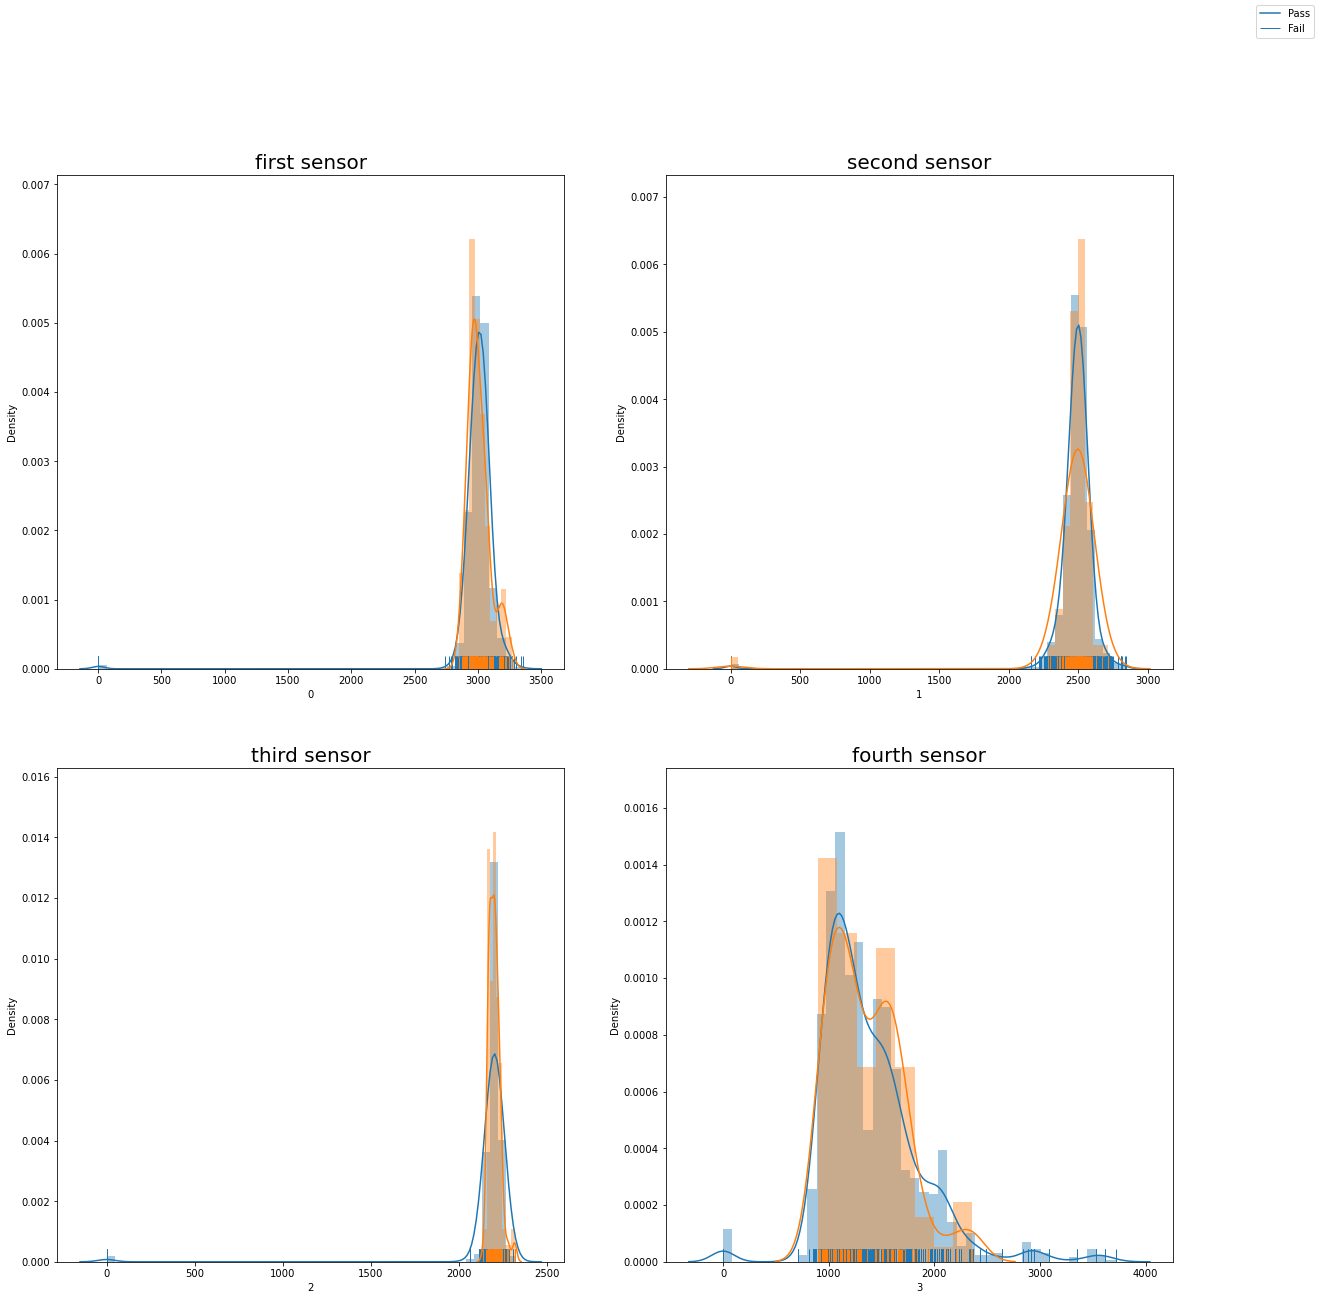

In [9]:
fig = plt.figure(figsize = (20, 20))

plt.subplot(2,2,1)
for target in targets:
  sns.distplot(target['0'], hist=True, rug=True)
plt.title('first sensor', fontsize = 20)

plt.subplot(2,2,2)
for target in targets:
  sns.distplot(target['1'], hist=True, rug=True)
plt.title('second sensor', fontsize = 20)

plt.subplot(2,2,3)
for target in targets:
  sns.distplot(target['2'], hist=True, rug=True)
plt.title('third sensor', fontsize = 20)

plt.subplot(2,2,4)
for target in targets:
  sns.distplot(target['3'], hist=True, rug=True)
plt.title('fourth sensor', fontsize = 20)

fig.legend(labels = ['Pass', 'Fail'])
plt.show()

# class imbalance인지 확인하기 위하여 파이차트로 데이터의 class의 비율 확인
- imbalace 경우에 accuracy같은 지표를 쓰면 안됨 &rarr; F1 score, precision, recall 사용해야함
- 또는 over/under sampling 기법으로 class balance 맞춰야함

오버샘플링 : 적은 비율의 데이터를 늘리기
- 방법 1 데이터 단순 
복제
- 방법 2 SMOTE 데이터 분포를 고려하여 사이사이에 데이터를 생성

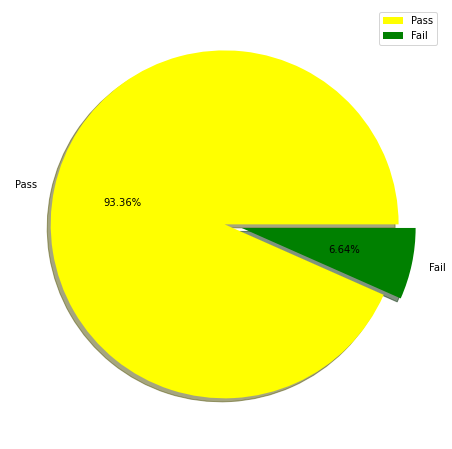

In [10]:
labels = ['Pass', 'Fail']
size = data['Pass/Fail'].value_counts()
colors = ['yellow', 'green']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8,8)
plt.pie(size, labels = labels, colors = colors, explode = explode, autopct = '%.2f%%', shadow = True)
plt.axis('off')
plt.legend()
plt.show()

## 다중공선성 확인 및 feature 제거
- threshold &rarr; 상관계수 0.95

Text(0.5, 1.0, 'Correlation')

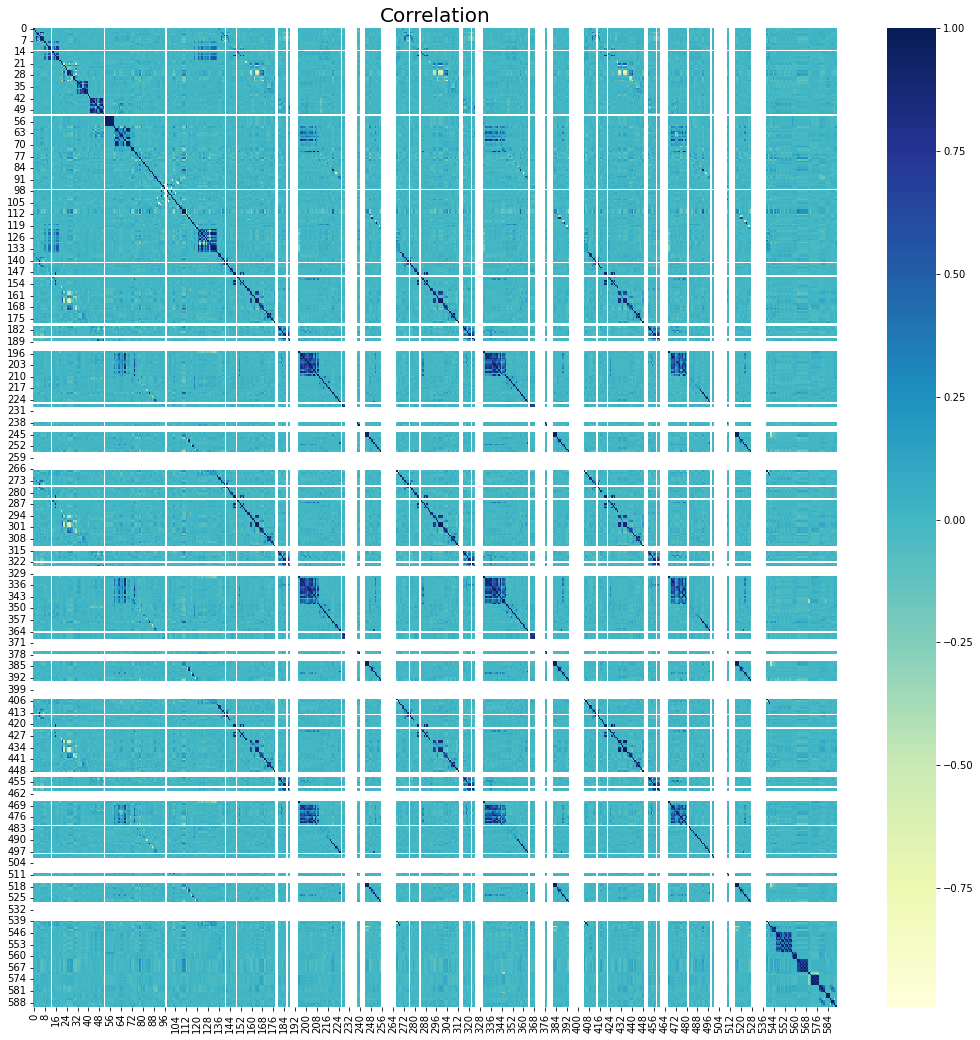

In [11]:
plt.rcParams['figure.figsize'] = (18,18)
sns.heatmap(data.corr(), cmap = 'YlGnBu')
plt.title('Correlation', fontsize = 20)

In [12]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2)) 
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [13]:
data = remove_collinear_features(data,0.95)

5 | 2 | 0.99
27 | 25 | 0.98
38 | 37 | 0.97
49 | 42 | 1.0
50 | 46 | 0.97
54 | 53 | 1.0
55 | 53 | 0.95
56 | 53 | 0.98
56 | 54 | 0.97
56 | 55 | 0.96
57 | 53 | 0.97
57 | 54 | 0.96
57 | 55 | 0.98
57 | 56 | 0.99
58 | 56 | 0.96
66 | 60 | 0.97
69 | 60 | 0.96
69 | 66 | 0.97
70 | 60 | 0.97
70 | 66 | 0.99
70 | 69 | 0.97
73 | 72 | 0.98
96 | 94 | 0.96
104 | 99 | 0.99
105 | 92 | 0.99
106 | 93 | 0.99
110 | 109 | 1.0
111 | 109 | 1.0
111 | 110 | 1.0
123 | 121 | 1.0
124 | 121 | 1.0
124 | 123 | 1.0
127 | 122 | 0.97
131 | 121 | 1.0
131 | 123 | 0.99
131 | 124 | 0.99
133 | 132 | 0.95
140 | 4 | 1.0
148 | 16 | 0.96
152 | 16 | 0.96
152 | 148 | 0.99
165 | 164 | 0.96
174 | 172 | 1.0
206 | 74 | 1.0
209 | 74 | 1.0
209 | 206 | 1.0
220 | 85 | 0.97
246 | 244 | 0.96
246 | 245 | 0.98
249 | 114 | 0.98
252 | 117 | 0.99
271 | 136 | 0.97
272 | 137 | 0.98
274 | 139 | 0.99
275 | 4 | 1.0
275 | 140 | 1.0
277 | 142 | 0.98
279 | 144 | 0.98
280 | 145 | 0.96
281 | 146 | 0.95
282 | 147 | 1.0
283 | 16 | 0.96
283 | 148 | 1.0
283 | 15

In [14]:
data.shape

(1567, 382)

In [15]:
data = data.drop(columns = ['Time'], axis = 1)
data

,0,1,2,3,4,6,7,8,9,10,...,573,578,579,581,582,583,586,587,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,0.3157,0.0000,0.0000,0.0000,0.5005,0.0118,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,0.2653,0.0096,0.0201,208.2045,0.5019,0.0223,0.0096,0.0201,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,0.1882,0.0584,0.0484,82.8602,0.4958,0.0157,0.0584,0.0484,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,0.1738,0.0202,0.0149,73.8432,0.4990,0.0103,0.0202,0.0149,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,0.2224,0.0000,0.0000,0.0000,0.4800,0.4766,0.0202,0.0149,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,...,0.2363,0.0068,0.0138,203.1720,0.4988,0.0143,0.0068,0.0138,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,-0.0093,...,0.3891,0.0000,0.0000,0.0000,0.4975,0.0131,0.0068,0.0138,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,0.0000,0.0000,0.0000,...,0.4154,0.0197,0.0086,43.5231,0.4987,0.0153,0.0197,0.0086,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,0.0032,...,0.3669,0.0262,0.0245,93.4941,0.5004,0.0178,0.0262,0.0245,93.4941,-1


In [16]:
x = data.iloc[:, :306]
y = data['Pass/Fail']

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 2023)

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [19]:
# y_train = np.where(np.array(y_train)<0, 0, 1)
# y_test = np.where(np.array(y_test)<0, 0, 1)

In [20]:
y_train = np.where(np.array(y_train)<0, 1, 0)
y_test = np.where(np.array(y_test)<0, 1, 0)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

## XGBoost

In [22]:
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import OneClassSVM

xgb = XGBClassifier(random_state = 2023)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print('accuracy : ',accuracy_score(y_pred, y_test))
print('f1 score : ',f1_score(y_pred, y_test))

accuracy :  0.9235668789808917
f1 score :  0.9602649006622517


## Random Forest

In [23]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 2023)
#n_estimators : 트리의 개수
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('accuracy : ',accuracy_score(y_pred, y_test))
print('f1 score : ', f1_score(y_pred, y_test))

accuracy :  0.9235668789808917
f1 score :  0.9602649006622517


## Oneclass Support Vector Machine (OC-SVM)
- PARAMETERS : kernal, gamma, nu
- nu : abnormal의 비율
- kernal : 데이터간의 거리 계산 방식 poly/ linear/ rbf / sigmoid ...
- c: soft/hard 마진에 대한 tolerance. 높을수록 과적합 가능성 &uarr;
- gamma : 하나의 커널 포인트의 영향력(거리)

In [24]:
svc = OneClassSVM(kernel = 'rbf', gamma = 'auto', nu = 0.005)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
y_test = np.where(np.array(y_test)<0, 0, 1)
print('accuracy : ',accuracy_score(y_pred, y_test))
print('f1 score : ', f1_score(y_pred, y_test))

accuracy :  0.9235668789808917
f1 score :  0.9602649006622517


<AxesSubplot:>

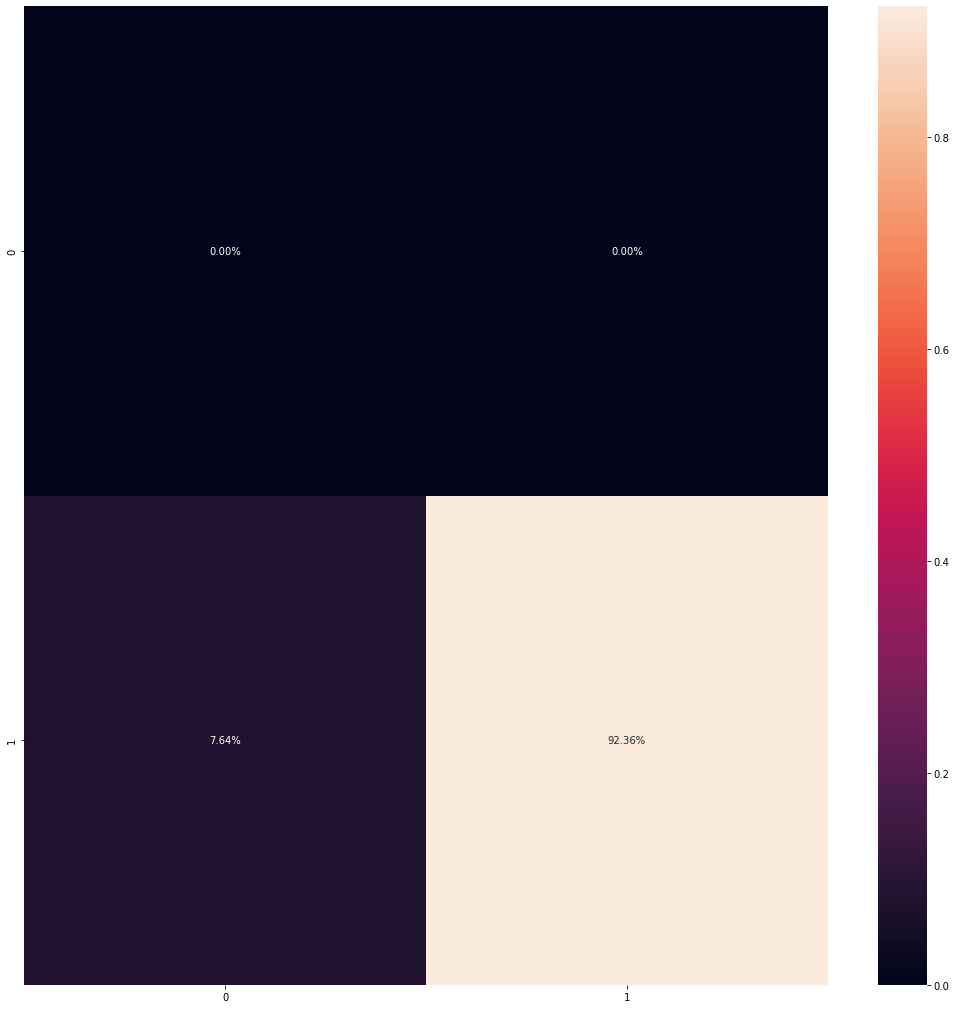

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), fmt = '.2%',annot = True)